In [1]:
import numpy as np
import pandas as pd

In [2]:
# Logistic regression model from scratch with regularization and underflow control 

In [3]:
# Implement the sigmoid function using numpy

def sigmoid(x):
    
    s = 1/(1 + np.exp(-x))
    
    return s

In [4]:
# Implement parameter initialization of w (weight vector) and b (bias) 

def initialize(dim):

    w = np.zeros((1, dim))
    b = 0

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))

    return w,b

In [5]:
# Compute the cost of logistic regression - overflow/underflow control

def compute_cost(w,b,X,Y,regularization="none",lamda=1):

    w = w.reshape(1,-1)
    Y = Y.reshape(1,-1)
    z = b + np.dot(w,X.T)
    sigma = sigmoid(z)
    m = X.shape[0]
    
    # Underflow control
    cost = 0   
    for i in range(Y.shape[1]):
        if Y[0,i] == 1:
            if regularization == "L1":
                cost += (1 / m) * np.log(1 + np.exp(-z[0,i])) + (lamda/m) *np.sum(np.abs(w))
            elif regularization == "L2":              
                cost += (1 / m) * np.log(1 + np.exp(-z[0,i])) + (lamda/2*m) *np.sum(np.square(w))
            else:
                cost += (1 / m) * np.log(1 + np.exp(-z[0,i]))
        elif Y[0,i] == 0:
            if regularization == "L1":
                cost += (1 / m) * np.log(1 + np.exp(z[0,i])) + (lamda/m) *np.sum(np.abs(w))
            elif regularization == "L2":
                cost += (1 / m) * np.log(1 + np.exp(z[0,i])) + (lamda/2*m) *np.sum(np.square(w))
            else:
                cost += (1 / m) * np.log(1 + np.exp(z[0,i]))
        


    return sigma, cost

In [6]:
# Compute the gradient of w and b

def gradient(w,b,X,Y,sigma):

    m = X.shape[0]
    dw = (1 / m) * np.dot((sigma-Y), X)
    db = (1/m) * np.sum(sigma-Y)

    #END CODE HERE

    return dw, db

In [7]:
# Implement the parameters update (For a parameter  𝜃 , the update rule is  𝜃=𝜃−𝛼 𝑑𝜃 , where  𝛼  is the learning rate)

def update_parameters(w,b,X,Y,num_iterations,learning_rate,regularization="none",lamda=1):
    
    
    for i in range(num_iterations):
        w = w.reshape(1,-1)
        w_prev = w
        b_prev = b
        
        # Cost and gradient calculation
        sigma, cost = compute_cost(w,b,X,Y,regularization,lamda)
        dw, db = gradient(w,b,X,Y,sigma)
        
        # update rule 
        if regularization == "L1":
            regul1 = lamda*np.sign(w)
            w = w_prev - learning_rate*dw -learning_rate*regul1
            b = b_prev - learning_rate*db
        elif regularization == "L2":
            regul2 = 2*lamda*w
            w = w_prev - learning_rate*dw -learning_rate*regul2
            b = b_prev - learning_rate*db
        else: 
            w = w_prev - learning_rate*dw
            b = b_prev - learning_rate*db
    

        # Print the cost every 100 training iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost)) 

    return w,b,dw,db

In [8]:
# Prediction

def predict(w, b, X):
    
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    # Compute vector "sigma" predicting the probabilities of input X
    y_pred = b+np.dot(w,X.T)
    sigma = sigmoid(y_pred)
    
    # Convert probabilities sigma[0,i] to actual predictions.
    Y_prediction = (sigma >= 0.5).astype(float)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [9]:
# Create a model using the above functions

def model(X_train, Y_train, X_test, Y_test, num_iterations = 20000, learning_rate = 0.009,regularization="L1",lamda=1):
    
    # initialize parameters
    w, b = initialize(X_train.shape[1])
    
    # Gradient descent
    w,b,dw,db = update_parameters(w,b,X_train,Y_train,num_iterations,learning_rate,regularization,lamda)
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

    return d


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.695142
Cost after iteration 200: 0.693884
Cost after iteration 300: 0.695881
Cost after iteration 400: 0.695245
Cost after iteration 500: 0.693905
Cost after iteration 600: 0.695934
Cost after iteration 700: 0.695129
Cost after iteration 800: 0.693980
Cost after iteration 900: 0.696016
Cost after iteration 1000: 0.694993
Cost after iteration 1100: 0.694060
Cost after iteration 1200: 0.696101
Cost after iteration 1300: 0.694854
Cost after iteration 1400: 0.694142
Cost after iteration 1500: 0.696188
Cost after iteration 1600: 0.694714
Cost after iteration 1700: 0.694225
Cost after iteration 1800: 0.696269
Cost after iteration 1900: 0.694562
train accuracy: 99.4375 %
test accuracy: 99.25 %


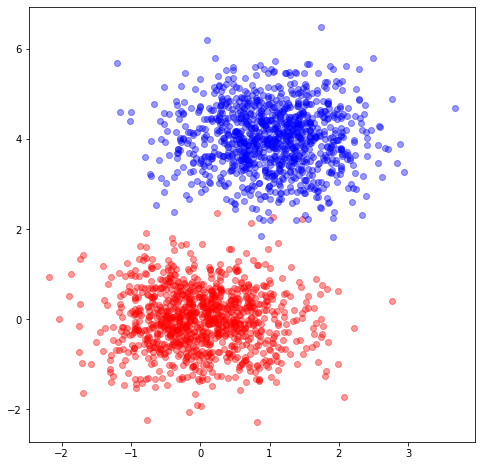

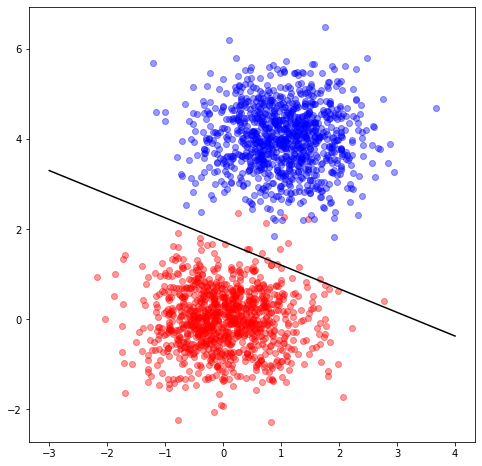

In [10]:
# Τest your code 

import matplotlib.pyplot as plt
num_observations = 1000 #number of observations of each 
mean_class1 = [0,0]
mean_class2 = [1, 4]
cov_matrix =  [[0.5, 0],[0, 0.5]]

import random
random.seed(0)
x1 = np.random.multivariate_normal(mean_class1, cov_matrix, num_observations)
x2 = np.random.multivariate_normal(mean_class2, cov_matrix, num_observations)

y1 = np.zeros((num_observations, 1))
y2 = np.ones((num_observations, 1))

X = np.vstack((x1,x2)) #Combine features together
y = np.vstack((y1,y2)) #Create the labels

plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)


d = model(X_train,y_train,X_test,y_test,num_iterations = 2000, learning_rate = 0.004,regularization="L1",lamda=1)

# Plot again
plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

x_boundary = np.linspace(-3, 4, 1000) # Return evenly spaced numbers over a specified interval.
weights =  d['w'][0]

# BEGIN CODE HERE
b =  d['b']
y_boundary = -(weights[0]*x_boundary/weights[1] + b/weights[1])
#END CODE HERE


plt.plot(x_boundary, y_boundary, color='black')